In [1]:
 # 📝 Scenario: Loan Approval Prediction (Multilayer Neural Network)
# Context
# Banks want to decide whether to approve a loan application. The decision depends on multiple factors, and the relationships are non-linear (not just a simple rule).
# Inputs (Features)
# Income level (normalized numeric value)
# Credit score (normalized numeric value)
# Output
# 1 = Loan approved
# 0 = Loan rejected
# Rule (intuitive, hidden from model)
# Higher income + good credit score → likely approved.
# Low income + poor credit score → likely rejected.
# Middle cases depend on combinations (non-linear patterns).

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('loan_synthetic (Multilayer).csv')
df.head()

,income,credit,approved,split
0,0.479667,0.480372,1,train
1,0.463180,0.327738,1,train
2,0.540594,0.489944,1,train
3,0.254435,0.860221,0,train
4,0.842699,0.508813,1,train


In [16]:
X = df[['income', 'credit']].values
y = df['approved'].values

X_mean = X.mean(axis = 0, keepdims=True)
X_std = X.std(axis = 0, keepdims=True)

X_norm = (X - X_mean)/ X_std

print(X_mean, X_std)
print(X_norm)

[[0.43900566 0.52928312]] [[0.21181947 0.2198042 ]]
[[ 0.19196448 -0.22252023]
 [ 0.11412492 -0.91693223]
 [ 0.47959915 -0.17897457]
 ...
 [-0.88447164 -0.34428549]
 [-0.12662603 -0.28025144]
 [-0.11540477  0.59929674]]


In [17]:
def build_mlp():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2,)),          # 2 input features
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # churn probability
    ])
    return model

model_sgd = build_mlp()

sgd_small = tf.keras.optimizers.SGD(learning_rate = 0.01)

model_sgd.compile(optimizer = sgd_small, 
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

history_sgd = model_sgd.fit(X_norm, y, 
                            epochs = 200,
                            verbose = 0)

print("Final loss (SGD learning rate 0.01):", history_sgd.history['loss'][-1])
print("Final accuracy (SGD learning rate 0.01):", history_sgd.history['accuracy'][-1])

Final loss (SGD learning rate 0.01): 0.48975902795791626
Final accuracy (SGD learning rate 0.01): 0.7646666765213013


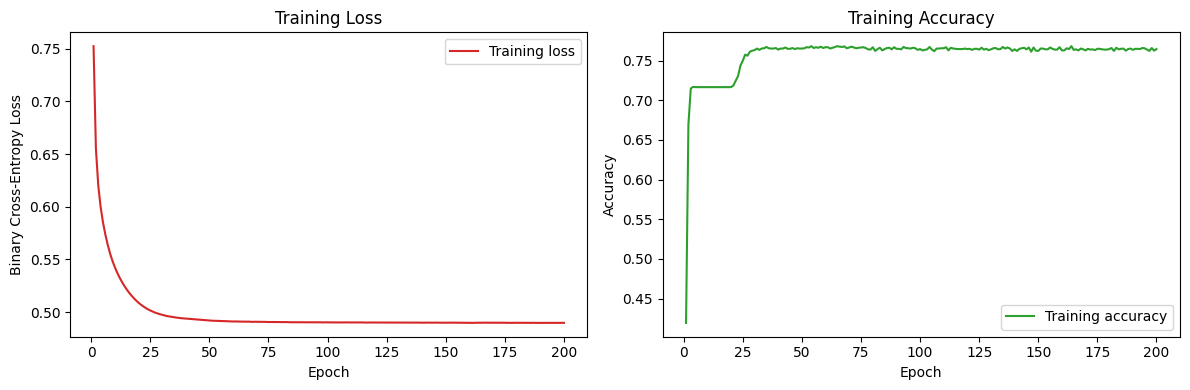

In [19]:
loss = history_sgd.history['loss']
acc  = history_sgd.history['accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12,4))

# --- Loss ---
plt.subplot(1,2,1)
plt.plot(epochs, loss, label='Training loss', color='#d62728')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Training Loss')
plt.legend()

# --- Accuracy ---
plt.subplot(1,2,2)
plt.plot(epochs, acc, label='Training accuracy', color='#2ca02c')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.tight_layout()
plt.show()